# Problem 2

Use this notebook to write your code for problem 2. You may reuse your SGD code from last week.

In [186]:
import random
import numpy.linalg as LA
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

The following function may be useful for loading the necessary data.

In [54]:
def load_data(filename):
    """
    Function loads data stored in the file filename and returns it as a numpy ndarray.
    
    Inputs:
        filename: given as a string.
        
    Outputs:
        Data contained in the file, returned as a numpy ndarray
    """
    return np.loadtxt(filename, skiprows=1, delimiter=',')

In [191]:
# load data
train1 = load_data('data/wine_training1.txt')
train2 = load_data('data/wine_training2.txt')
test1 = load_data('data/wine_testing.txt')
test2 = load_data('data/wine_testing.txt')

test_X1 = test1[:, 1:]
#insert bias
test_X1 = np.insert(test_X1, 0, 1, axis = 1)
test_Y1 = test1[:, 0]

test_X2 = test2[:, 1:]
#insert bias
test_X2 = np.insert(test_X2, 0, 1, axis = 1)
test_Y2 = test2[:, 0]

# normalize the data
X1 = train1[:, 1:]
X1 = np.insert(X1, 0, 1, axis = 1)
for j in range(1, len(X1[0])):
    mean = np.mean(X1[:, j])
    std = np.std(X1[:, j])
    for i in range(len(X1)):
        X1[i][j] = (X1[i][j] - mean) / std
    for k in range(len(test_X1)):
        test_X1[k][j] = (test_X1[k][j] - mean) / std
Y1 = train1[:, 0]

X2 = train2[:, 1:]
X2 = np.insert(X2, 0, 1, axis = 1)
for j in range(1, len(X2[0])):
    mean = np.mean(X2[:, j])
    std = np.std(X2[:, j])
    for i in range(len(X2)):
        X2[i][j] = (X2[i][j] - mean) / std
    for k in range(len(test_X2)):
        test_X2[k][j] = (test_X2[k][j] - mean) / std
Y2 = train2[:, 0]

In [249]:
def log_loss(X, Y, w):
    '''
    Calculate the log loss function.
    
    Inputs:
        X: A (N, D) shaped numpy array containing the data points.
        Y: A (N, ) shaped numpy array containing the (float) labels of the data points.
        w: A (D, ) shaped numpy array containing the weight vector.
    
    Outputs:
        The loss evaluated with respect to X, Y, and w.
    '''
    
    loss = 0
    for i in range(len(X)):
        loss += -np.log(1 / (1 + np.exp(-Y[i] * np.dot(w, X[i]))))
    
    return loss / len(X)

def gradient(x, y, w, lam, N):
    '''
    Calculate the gradient of the loss function with respect to
    a single point (x, y), and using weight vector w.
    
    Inputs:
        x: A (D, ) shaped numpy array containing a single data point.
        y: The float label for the data point.
        w: A (D, ) shaped numpy array containing the weight vector.
        lam: regularization strength
        N: number of points
        
    Output:
        The gradient of the loss with respect to x, y, and w. 
    '''
    
    gradient = (-x * y / (1 + np.exp(y * np.dot(w, x)))) + ((2 * lam * w) / N)
    
    return gradient  

def SGD(X, Y, eta, N_epochs, lam):
    '''
    Perform SGD using dataset (X, Y), initial weight vector w_start,
    learning rate eta, and N_epochs epochs.
    
    Inputs:
        X: A (N, D) shaped numpy array containing the data points.
        Y: A (N, ) shaped numpy array containing the (float) labels of the data points.
        eta: The step size.
        N_epochs: The number of epochs (iterations) to run SGD.
        lam: regularization strength
        
    Outputs:
        w: A (D, ) shaped array containing the final weight vector.
    '''


    w  = np.random.random(len(X[0]))
    for i in range(N_epochs):
        for j in np.random.permutation(len(X)):
            w -= eta * gradient(X[j], Y[j], w, lam, len(X))
    return w

In [250]:
# getting the desired lambdas 
lam = [0] * 15
lam[0] = 0.00001
for i in range(1, len(lam)):
    lam[i] = lam[i - 1] * 5

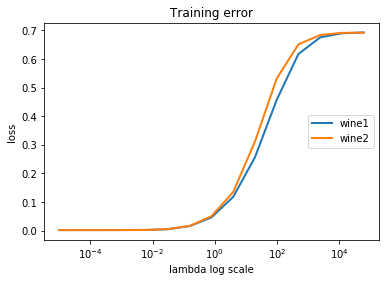

In [251]:
plt.figure()
# lis of training errors
wine1 = []
wine2 = []
# list of testing errors
test_wine1 = []
test_wine2 = []
# list of norms
norm1 = []
norm2 = []
eta = 5e-4
N_epochs = 20000
for i in range(15):
    # run gradient descent
    d1 = SGD(X1, Y1, eta, N_epochs, lam[i])
    # append to lists
    wine1.append(log_loss(X1, Y1, d1))
    test_wine1.append(log_loss(test_X1, test_Y1, d1))
    norm1.append(LA.norm(d1))
for i in range(15):
    #run gradient descent with other data set
    d2 = SGD(X2, Y2, eta, N_epochs, lam[i])
    # append to lists
    wine2.append(log_loss(X2, Y2, d2))
    test_wine2.append(log_loss(test_X2, test_Y2, d2))
    norm2.append(LA.norm(d2))
#plot test error plot
plt.plot(lam, wine1, linewidth = 2)
plt.plot(lam, wine2, linewidth = 2)
plt.xscale('log')
plt.legend(['wine1', 'wine2'], loc = 'right')
plt.xlabel('lambda log scale')
plt.ylabel('loss')
plt.title('Training error')
plt.show()

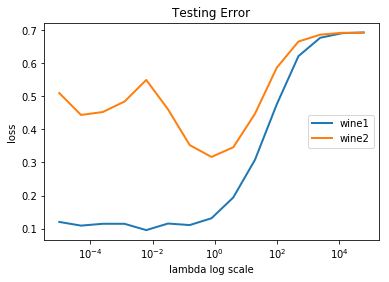

In [252]:
# plot testing error plot
plt.figure()
plt.plot(lam, test_wine1, linewidth = 2)
plt.plot(lam, test_wine2, linewidth = 2)
plt.xscale('log')
plt.legend(['wine1', 'wine2'], loc = 'right')
plt.xlabel('lambda log scale')
plt.ylabel('loss')
plt.title('Testing Error')
plt.show()

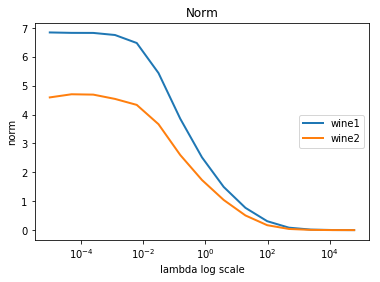

In [253]:
# plot norm plot
plt.figure()
plt.plot(lam, norm1, linewidth = 2)
plt.plot(lam, norm2, linewidth = 2)
plt.xscale('log')
plt.legend(['wine1', 'wine2'], loc = 'right')
plt.xlabel('lambda log scale')
plt.ylabel('norm')
plt.title('Norm')
plt.show()

In [254]:
lam

[1e-05,
 5e-05,
 0.00025,
 0.00125,
 0.00625,
 0.03125,
 0.15625,
 0.78125,
 3.90625,
 19.53125,
 97.65625,
 488.28125,
 2441.40625,
 12207.03125,
 61035.15625]